## Imports

In [1]:
from time_series_generation import *
from phid import *
from network_analysis import *
from hf_token import TOKEN

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Time Series

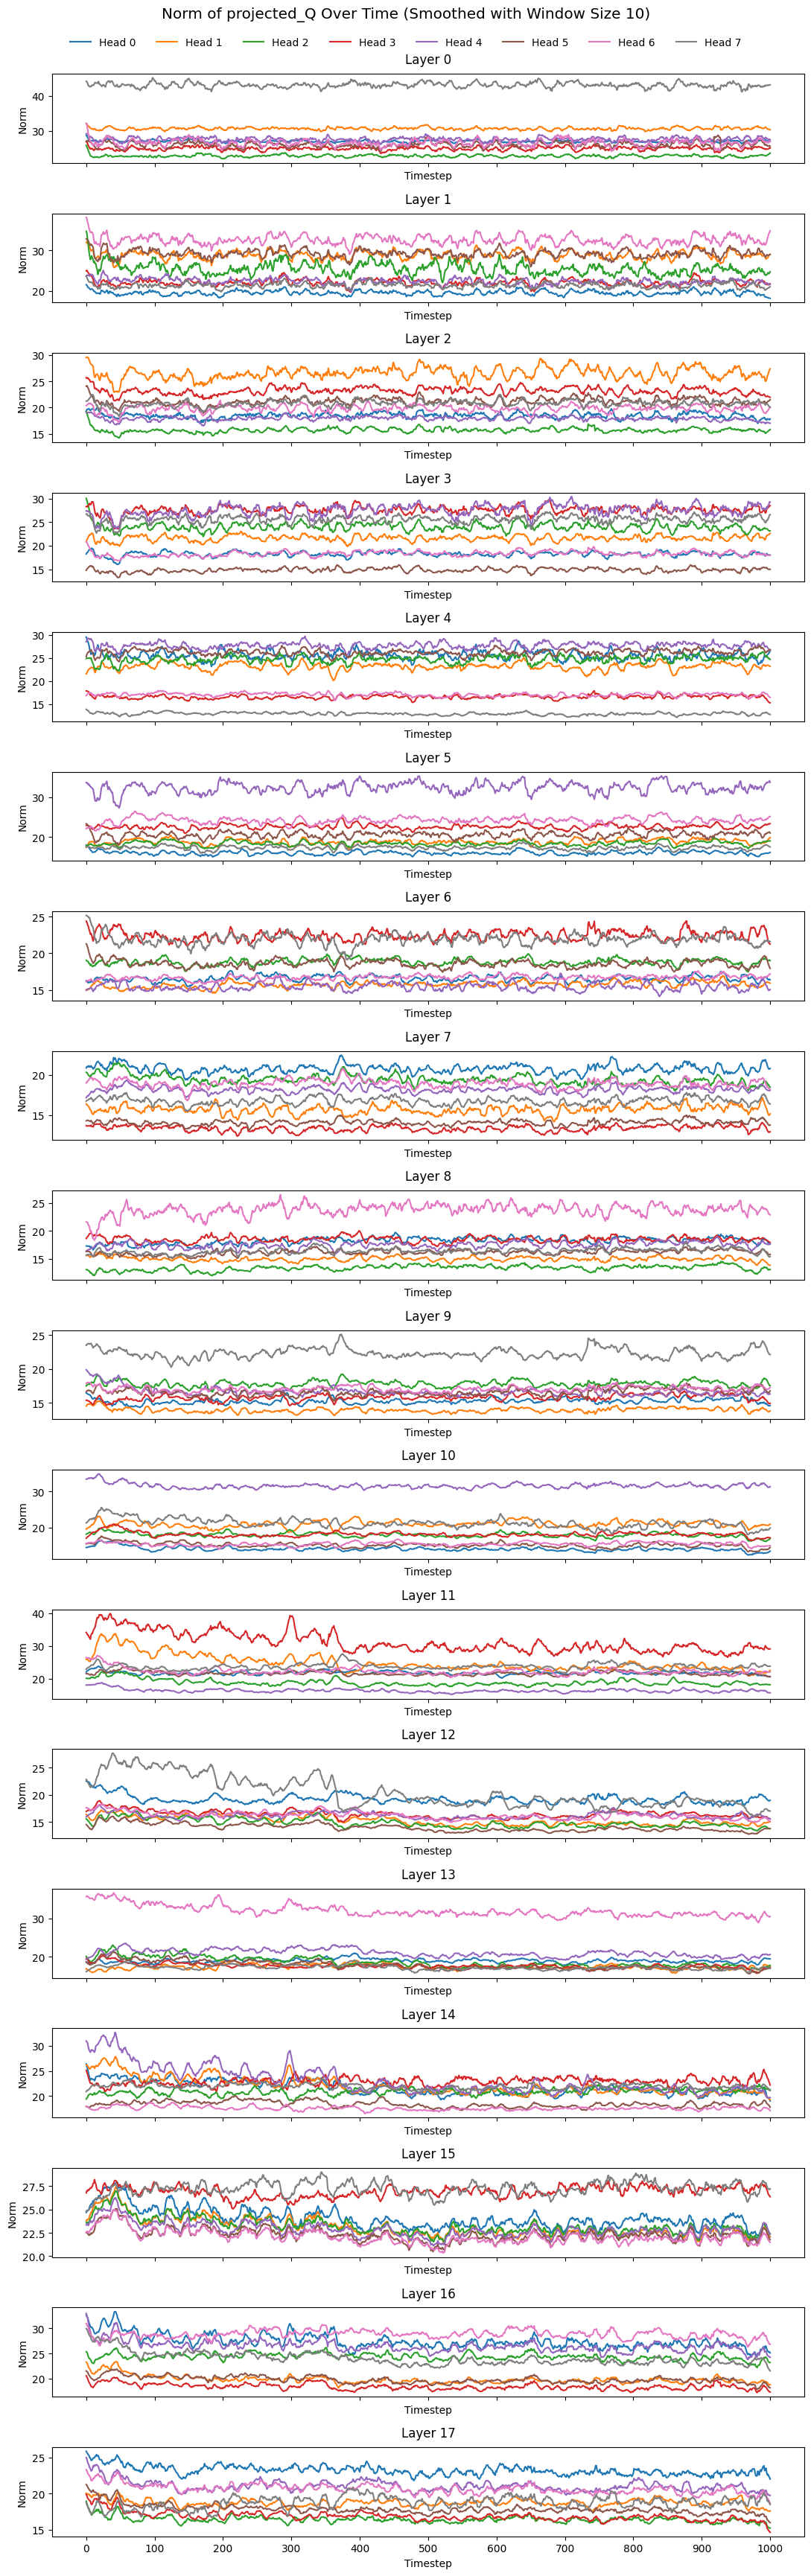

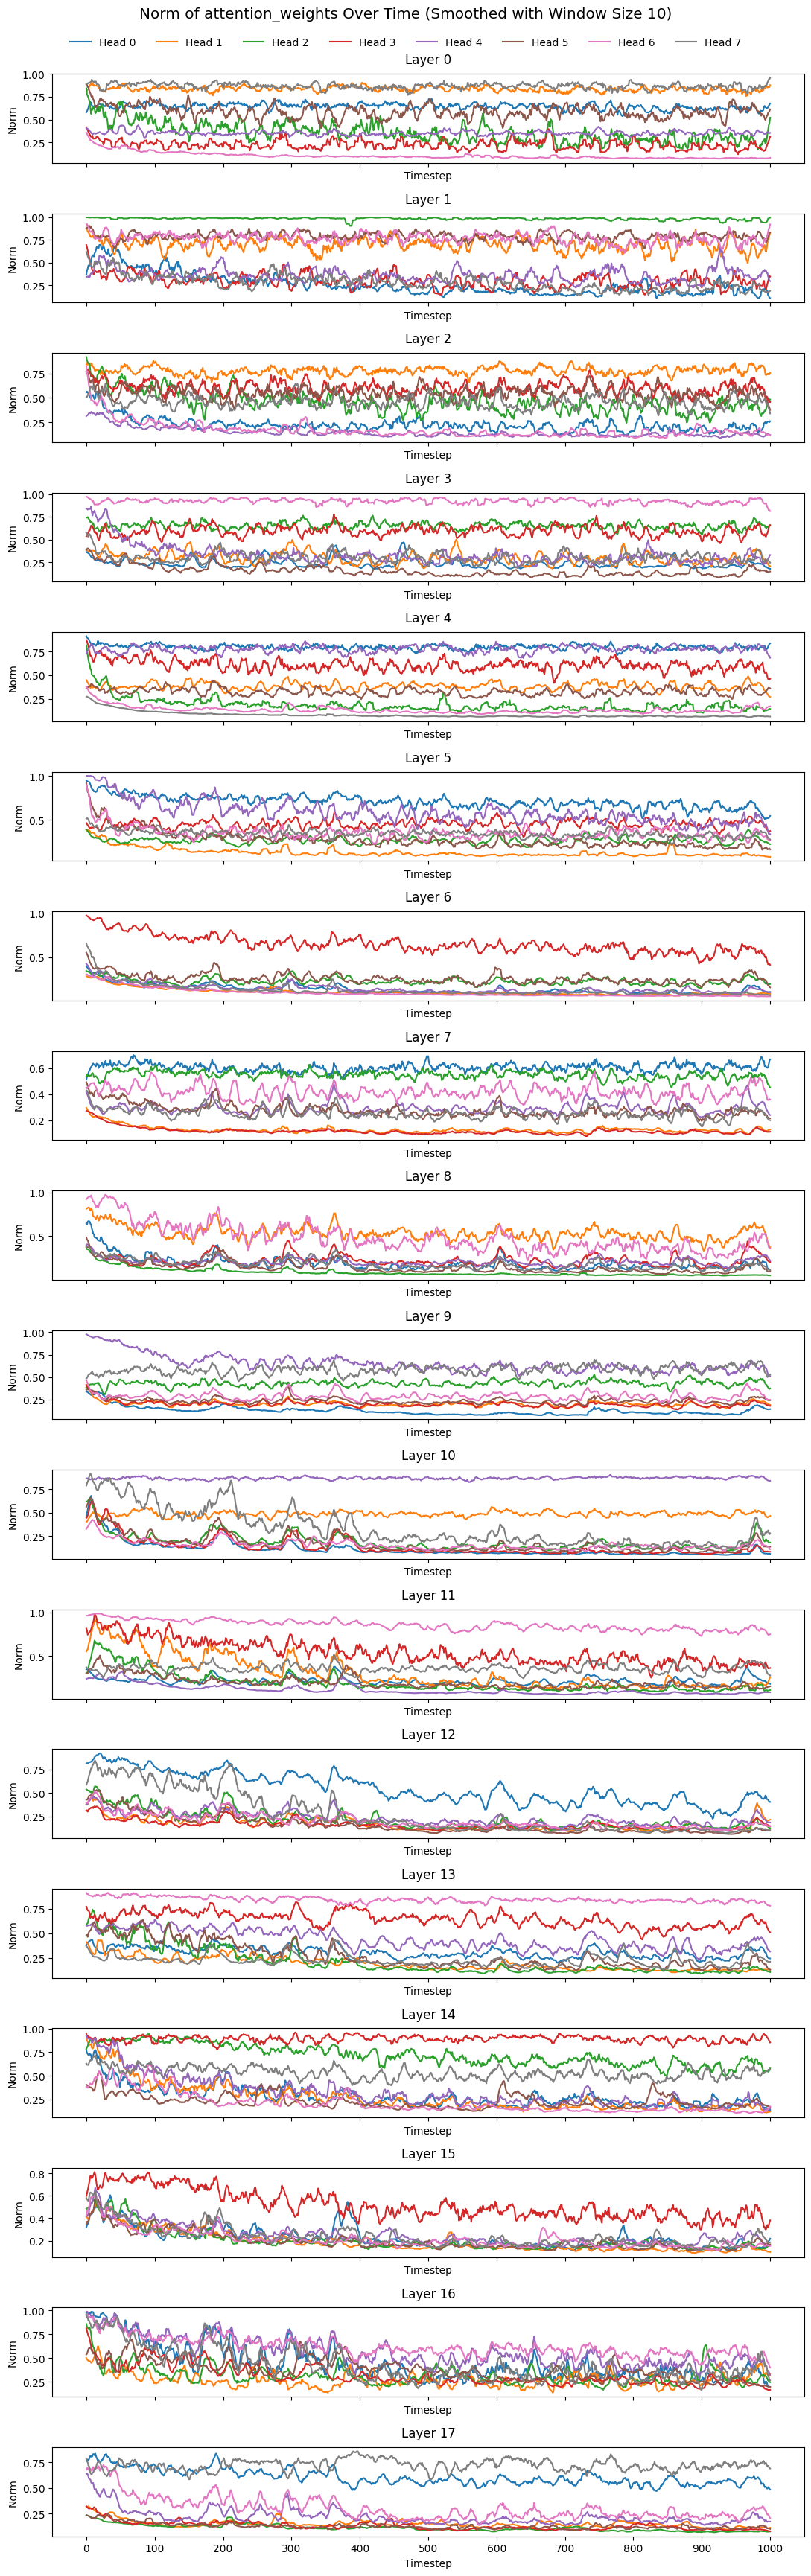

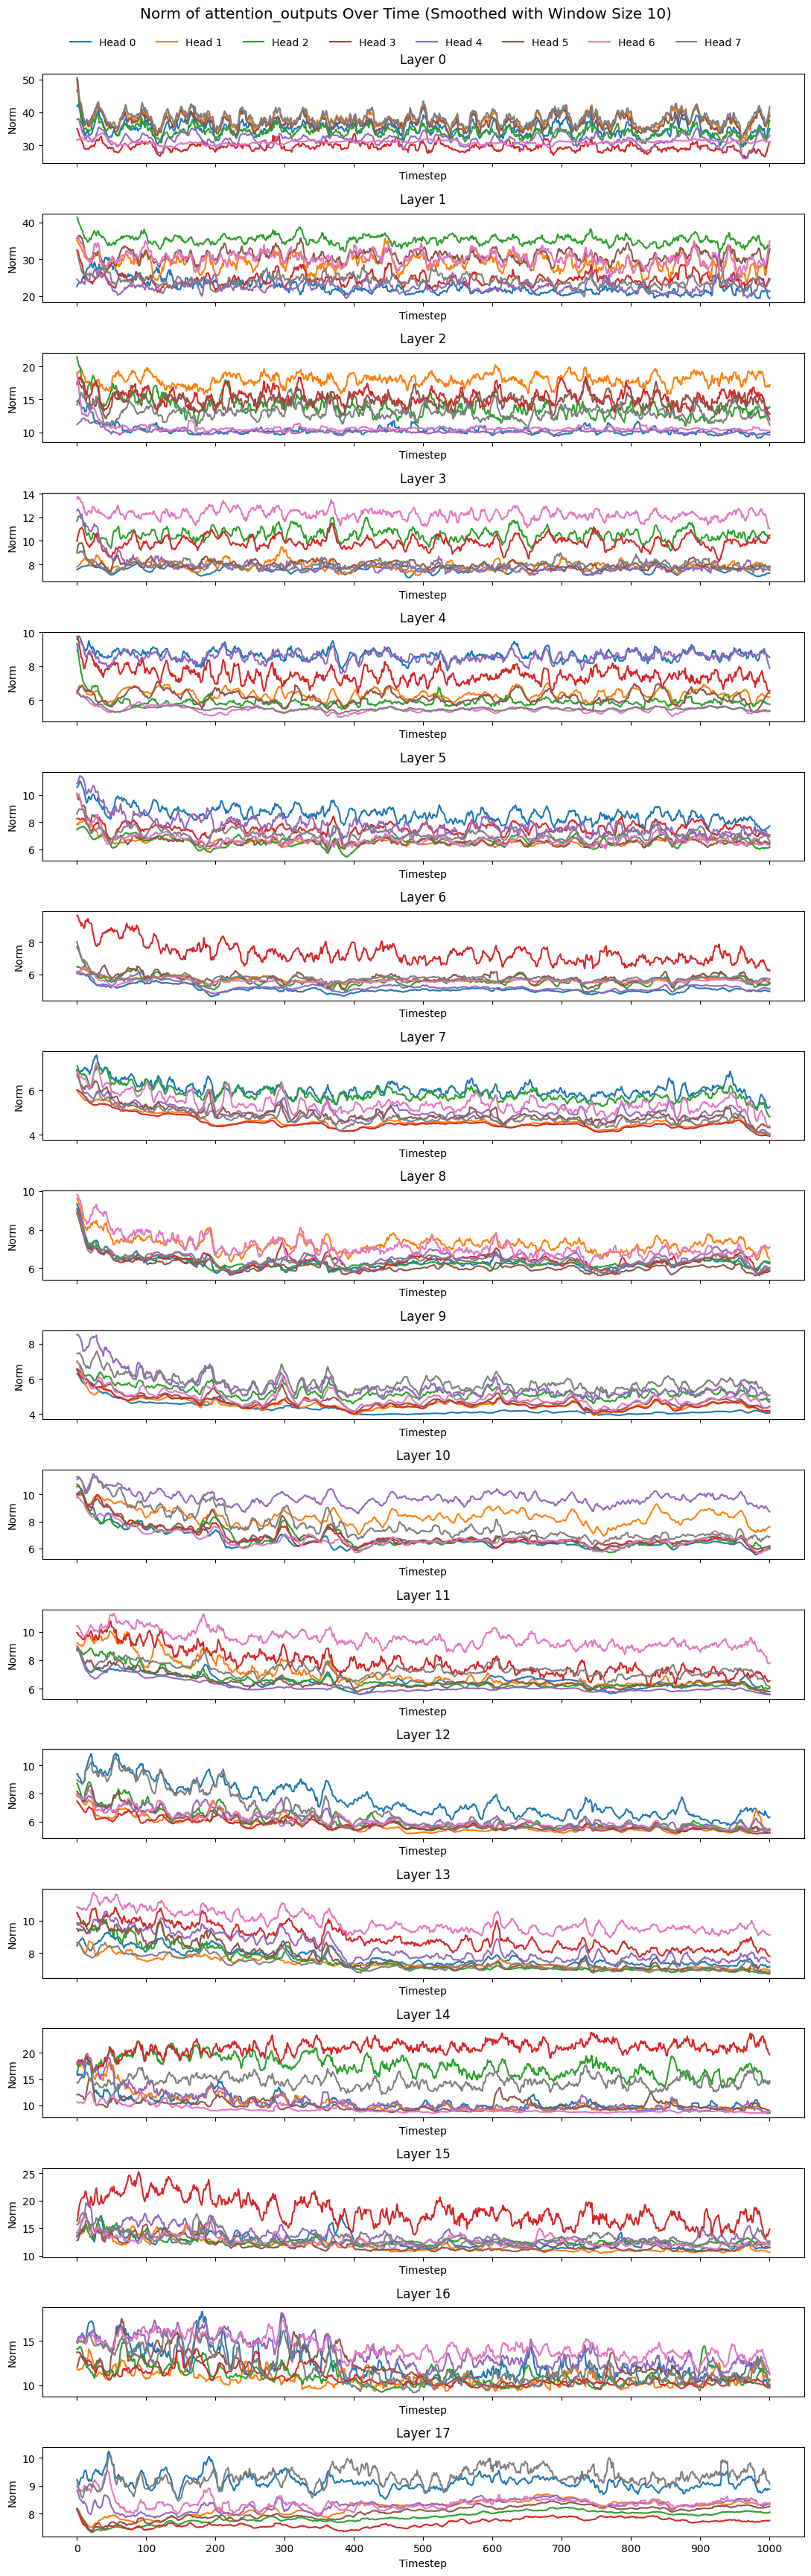

In [2]:
time_series = load_time_series(0) # Load the time series for the first 1000 tokens, choose from 0 to 4

plot_attention_metrics_norms_over_time(time_series, metrics=constants.METRICS_TRANSFORMER , num_heads_plot=8, smoothing_window=10, save=False)

## Redundancy and Synergy Heatmaps

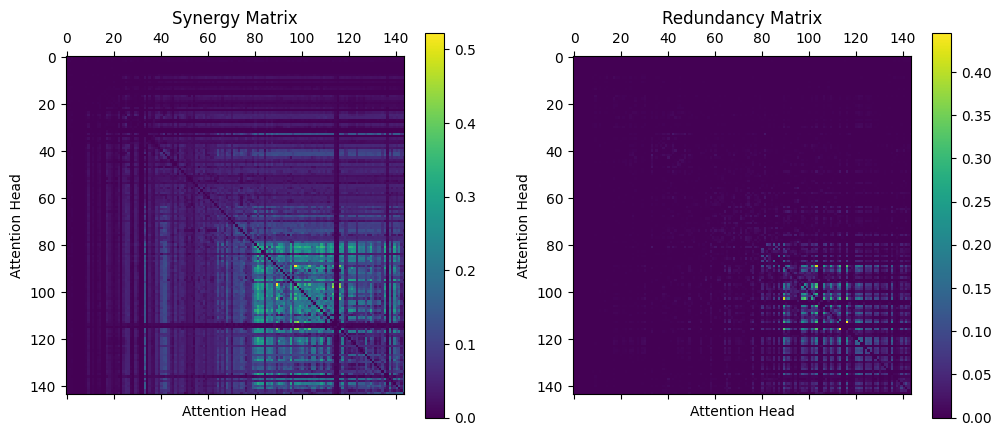

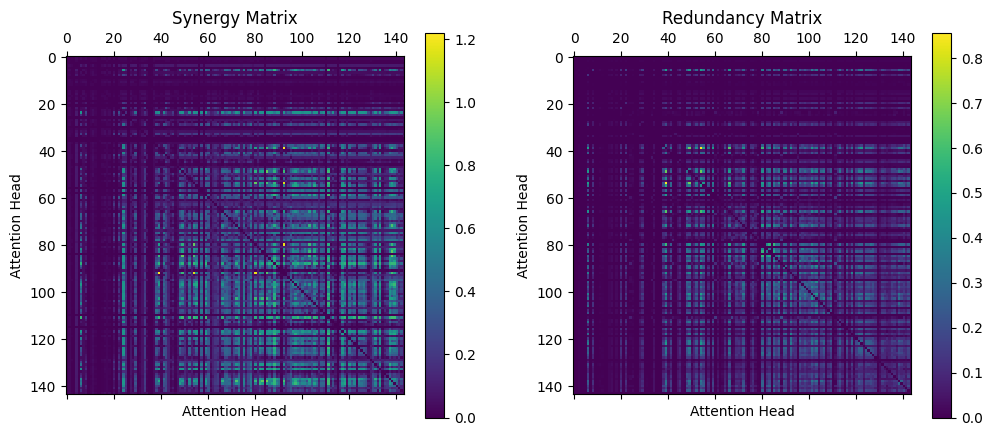

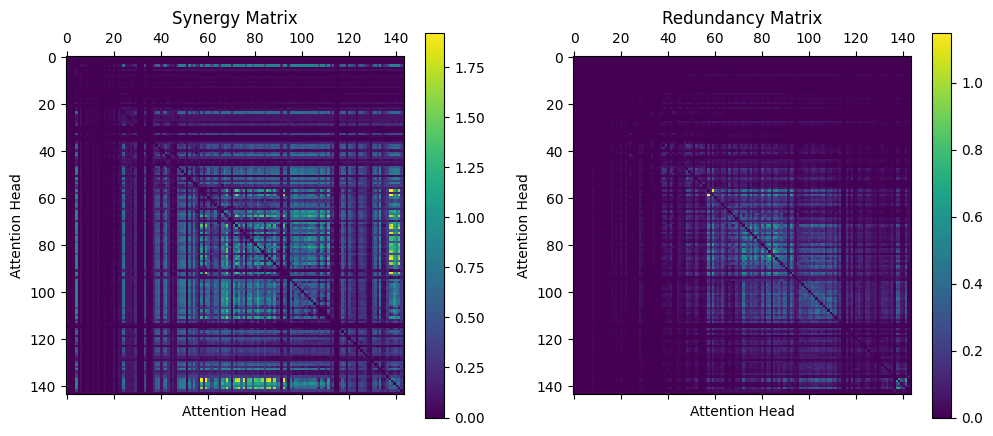

In [3]:
global_matrices, synergy_matrices, redundancy_matrices = compute_PhiID(time_series, metrics=constants.METRICS_TRANSFORMER)
plot_synergy_redundancy_PhiID(synergy_matrices, redundancy_matrices, save=False)
# plot_all_PhiID(global_matrices)

## Synergy-Redundancy Gradients

In [7]:
averages = calculate_averages_per_head(synergy_matrices, redundancy_matrices)
plot_averages_per_head(averages, save=True)

In [9]:
rank_gradients = compute_synergy_redundancy_rank_gradient(averages)
plot_synergy_redundancy_rank_gradient(rank_gradients, save=True)

In [10]:
gradient_percentiles = compute_gradient_percentile(averages)
plot_gradient_percentile(gradient_percentiles, save=True)

## Graph Connetivity

In [12]:
compare_synergy_redundancy(synergy_matrices, redundancy_matrices, constants.METRICS_TRANSFORMER, verbose=False)

({'projected_Q': {'Synergy': 0.08534599609110423,
   'Redundancy': 0.044679017167474,
   'Synergy > Redundancy': True},
  'attention_weights': {'Synergy': 0.07328899485585866,
   'Redundancy': 0.025558421761264574,
   'Synergy > Redundancy': True},
  'attention_outputs': {'Synergy': 0.10390088672742172,
   'Redundancy': 0.05624858738688571,
   'Synergy > Redundancy': True}},
 {'projected_Q': {'Synergy': 0.11346567138160085,
   'Redundancy': 0.2724604137288684,
   'Redundancy > Synergy': True},
  'attention_weights': {'Synergy': 0.11709556205103072,
   'Redundancy': 0.23450872497273512,
   'Redundancy > Synergy': True},
  'attention_outputs': {'Synergy': 0.10846595510673174,
   'Redundancy': 0.16880746818491887,
   'Redundancy > Synergy': True}})